In [2]:
import numpy as np
import matplotlib.pyplot as plt

---
### Exercise: Histograms

Walk through the notebook on histograms [[>](./histograms.ipynb)]. 

---
### Exercise: Plotting Normalized Functions

Consider the functions $f_n(x) = x^n \sin(x)$ over the interval $[-10, 10]$. Let $f_n^*$ denote the maximum of $|f_n(x)|$ over $[-10, 10]$. Plot the normalized functions $f_n/f_n^*$ for $n = 1, 2, 3, 4$. Follow these steps:

1. Plot each normalized function using a different line style.

2. Add a title to the plot.

3. Label the x- and y-axes.

4. Add a grid to the plot.

5. Display a legend.

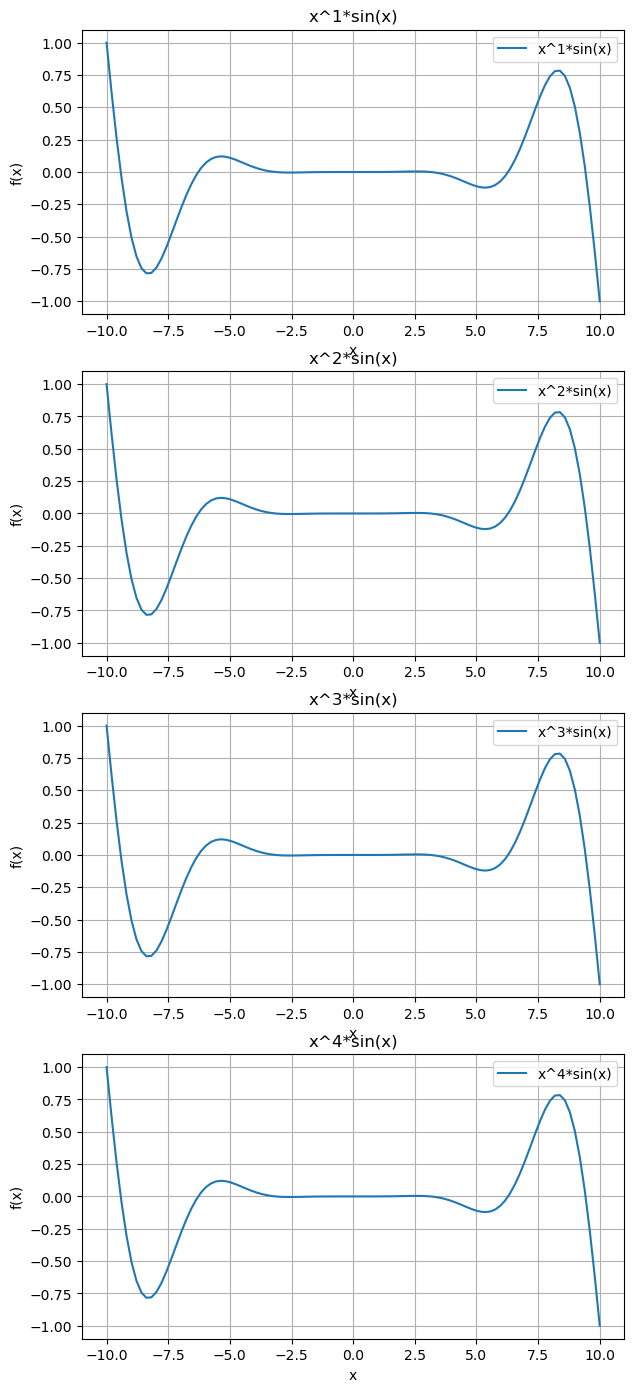

In [3]:
# code

x = np.linspace(-10,10,100)
funcs = [lambda x: x**i * np.sin(x) for i in range(1,5)]
max_values = [np.max(np.abs(func(x))) for func in funcs]
normalized_funcs = [lambda x: func(x)/max_val for _,(func,max_val) in enumerate(zip(funcs,max_values))]
figs, axes = plt.subplots(4, figsize=(7,17))
for i, ax in enumerate(axes):
    ax.plot(x, normalized_funcs[i](x), label=f'x^{i+1}*sin(x)')
    ax.set(title=f'x^{i+1}*sin(x)', xlabel="x", ylabel="f(x)")
    ax.grid()
    ax.legend()

---
### Exercise: Creating a Scatter Plot of Height and Weight

The `bmi.csv` dataset consists of 10,000 rows with three columns: `gender`, `height`, and `weight`. Males are encoded as 0 and females as 1. Show the relationship between height against weights using a default scatter plot.

Follow these steps:
1. Randomly select a smaller number of examples (e.g., 200) from the dataset.

2. Create a scatter plot of the randomly selected examples, showing the relationship between height and weight.

3. Use different colors and markers for each gender.

4. Add a title, x-label, y-label, grid, and legend to the plot.

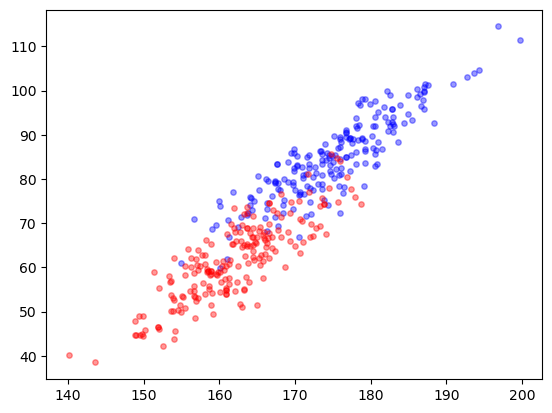

In [4]:
# code
data = np.loadtxt("./data/bmi.csv", delimiter=",", skiprows=1)
mask_male = data[:,0] == 0
mask_female = data[:,0] == 1
male_arr = data[mask_male]
fem_arr = data[mask_female]
male_arr = male_arr[np.random.randint(0,male_arr.shape[0], size=(200)),:]
fem_arr = fem_arr[np.random.randint(0,fem_arr.shape[0], size=(200)),:]
plt.scatter(male_arr[:,1], male_arr[:,2], c="b", alpha=0.4, s=15)
plt.scatter(fem_arr[:,1], fem_arr[:,2], c="r", alpha=0.4, s=15)


---
### Exercise: Comparing Temperature Distributions 

Compare the daily average temperature distributions in 2020 of three cities: Munich, Kuwait, and Fairbanks (Alaska). The temperatures (in degrees Fahrenheit) are provided in the file `./data/temp2020.csv`.

Follow these steps:
1. Load the temperature data from the file `data/temp2020.csv`.

2. Convert the temperatures from degrees Fahrenheit to degrees Celsius using the formula $C = 5(F - 32)/9$.

3. Plot histograms of the temperature distributions for each city on the same axes.

4. Customize the histograms by setting the bins from -40 to 35 with a width of 5, adding a legend showing the cities, and adding a title, x-label, and y-label.

(array([3., 0., 3., 8., 6., 3., 5., 6., 5., 5., 2., 3., 1., 5., 9., 5., 4.,
        4., 5., 2., 4., 1., 6., 5., 7., 6., 8., 3., 1., 2., 0., 1., 2., 2.,
        2.]),
 array([-39.72222222, -38.07301587, -36.42380952, -34.77460317,
        -33.12539683, -31.47619048, -29.82698413, -28.17777778,
        -26.52857143, -24.87936508, -23.23015873, -21.58095238,
        -19.93174603, -18.28253968, -16.63333333, -14.98412698,
        -13.33492063, -11.68571429, -10.03650794,  -8.38730159,
         -6.73809524,  -5.08888889,  -3.43968254,  -1.79047619,
         -0.14126984,   1.50793651,   3.15714286,   4.80634921,
          6.45555556,   8.1047619 ,   9.75396825,  11.4031746 ,
         13.05238095,  14.7015873 ,  16.35079365,  18.        ]),
 <BarContainer object of 35 artists>)

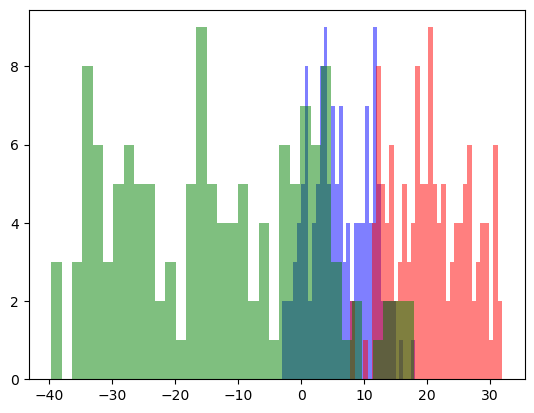

In [5]:
# code
data = np.loadtxt("./data/FKM_2020.csv", skiprows=1, delimiter=",") #Munich, kuwait, fairbanks

vec_lambda = np.vectorize(lambda x: 5*(x-32)/9)
data = vec_lambda(data)

plt.hist(data[:,0], bins=35, color="blue", alpha = 0.5)
plt.hist(data[:,1], bins=35, color="red", alpha=0.5)
plt.hist(data[:,2], bins=35, color="green", alpha=0.5)

---
### Exercise: Creating a Pairwise Scatter Plot of the Pima Indians Diabetes Dataset

The Pima Indians Diabetes dataset is a table consisting of $m$ rows and $n+1$ columns. Each row corresponds to a female patient of Pima Indian heritage. The columns correspond to medical features, with the last column representing the class label indicating whether a patient has diabetes or not.


Load the Pima dataset from the file `./data/pima.csv` using the following statement:

```python
    data = np.genfromtxt('../data/pima.csv', delimiter=',')
```

Create a pairwise scatter plot of the features, excluding the class labels. For diagonal grid cells (i, i), show a histogram of the i-th feature. Save the plot to a file.

Here is an example of what the pairwise scatter plot might look like:

<div>
<img src="./imgs/scatter_02.png" width="600"/>
</div>

In [10]:

pima = np.loadtxt("./data/pima.csv", delimiter=",")

(768, 9)


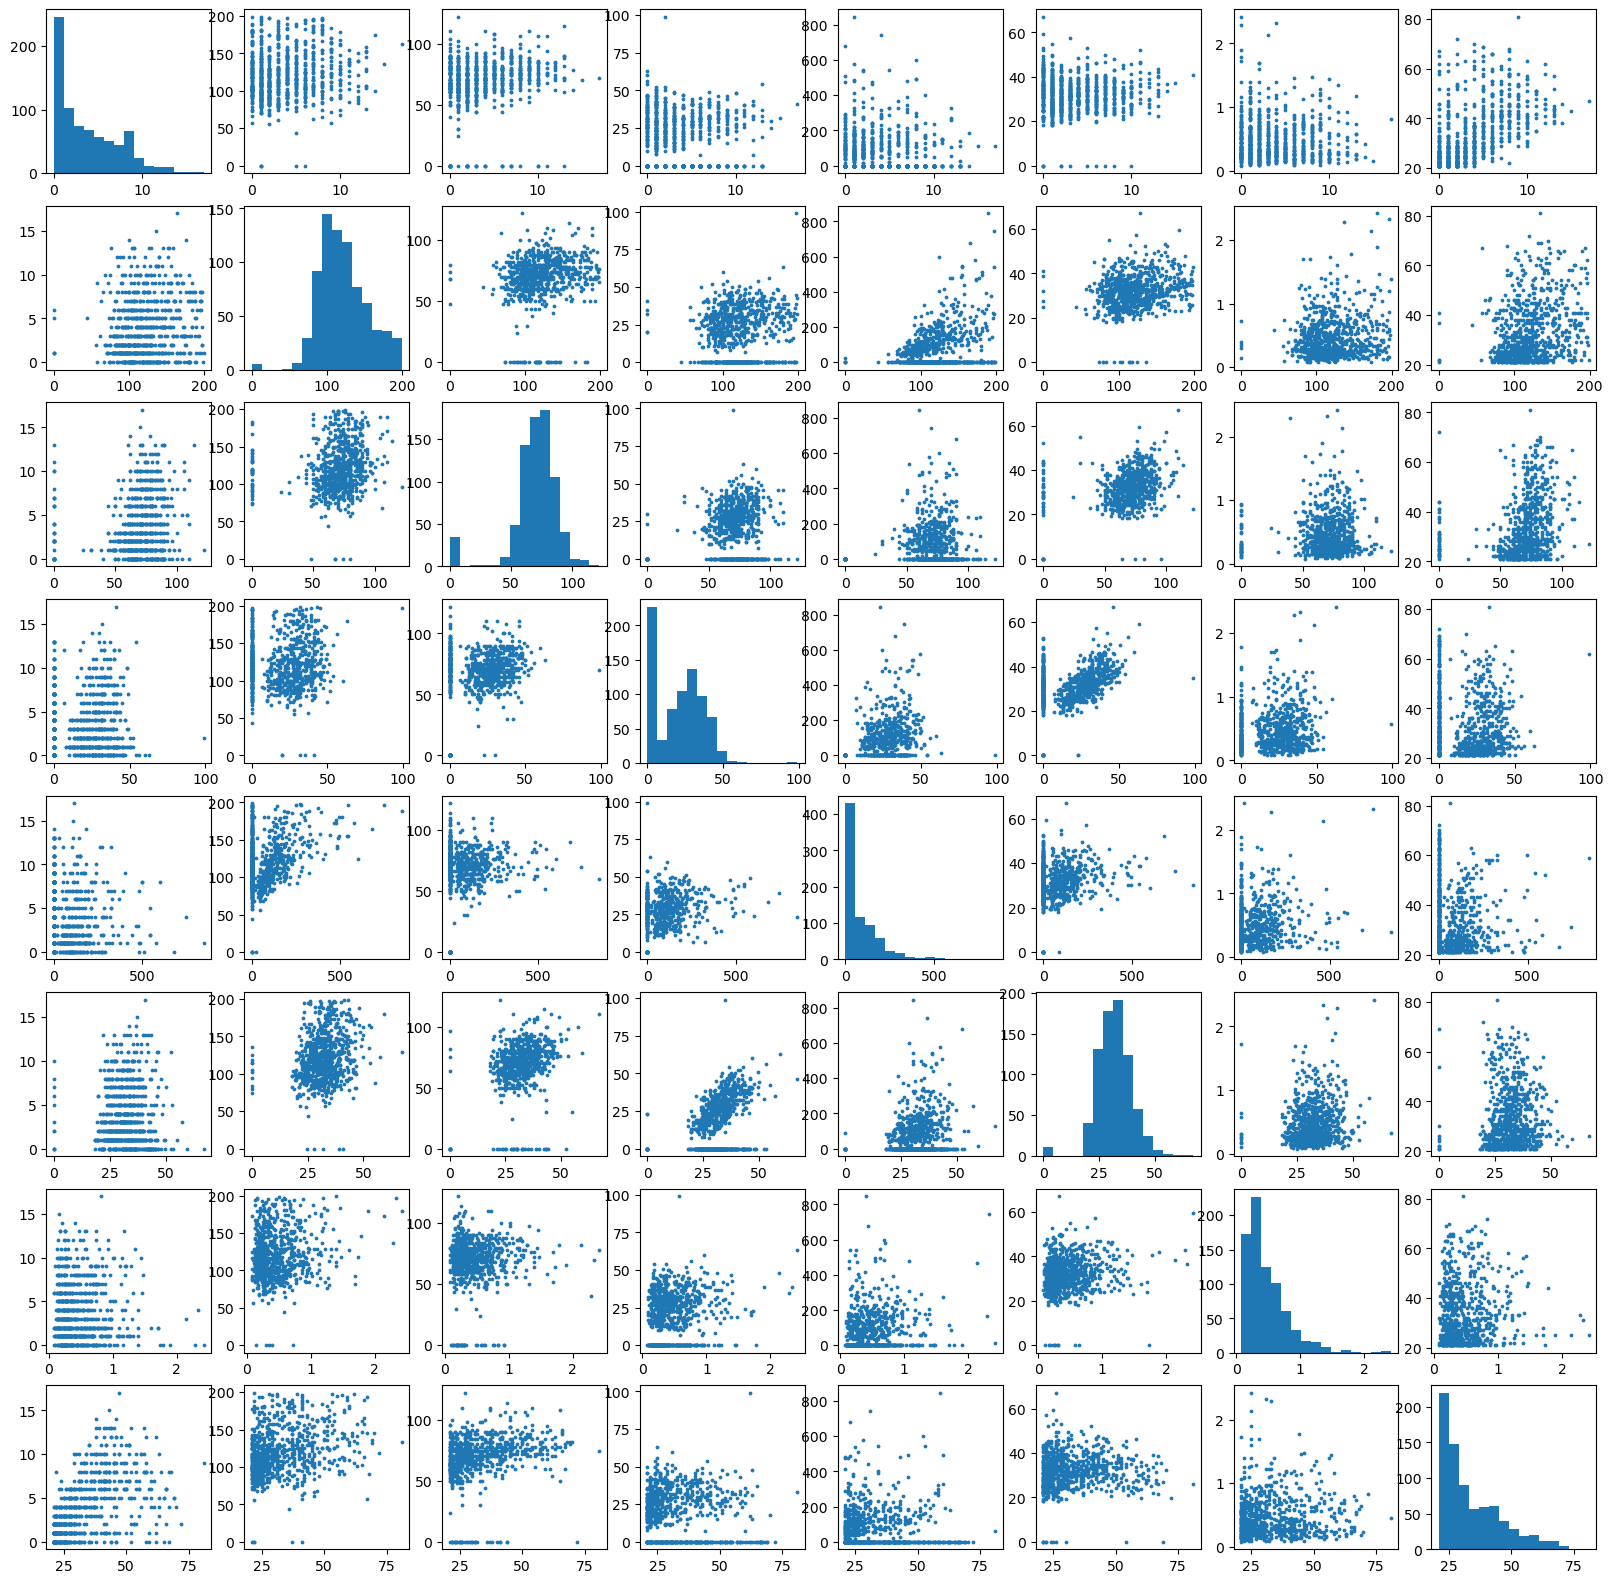

In [22]:
# code
figs, axes = plt.subplots(pima.shape[1]-1, pima.shape[1]-1, figsize=(20,20))
for i in range(pima.shape[1]-1):
    for j in range(pima.shape[1]-1):
        if i == j:
            axes[i,i].hist(pima[:,i], bins=15)
        else:
            axes[i,j].scatter(pima[:,i], pima[:,j], s=3)


---
### Exercise

Enhance your solution from the previous exercise by coloring the points in the pairwise scatter plot based on their class membership. 

Here is an example of what the colored pairwise scatter plot might look like:

<div>
<img src="./imgs/scatter_03.png" width="600"/>
</div>

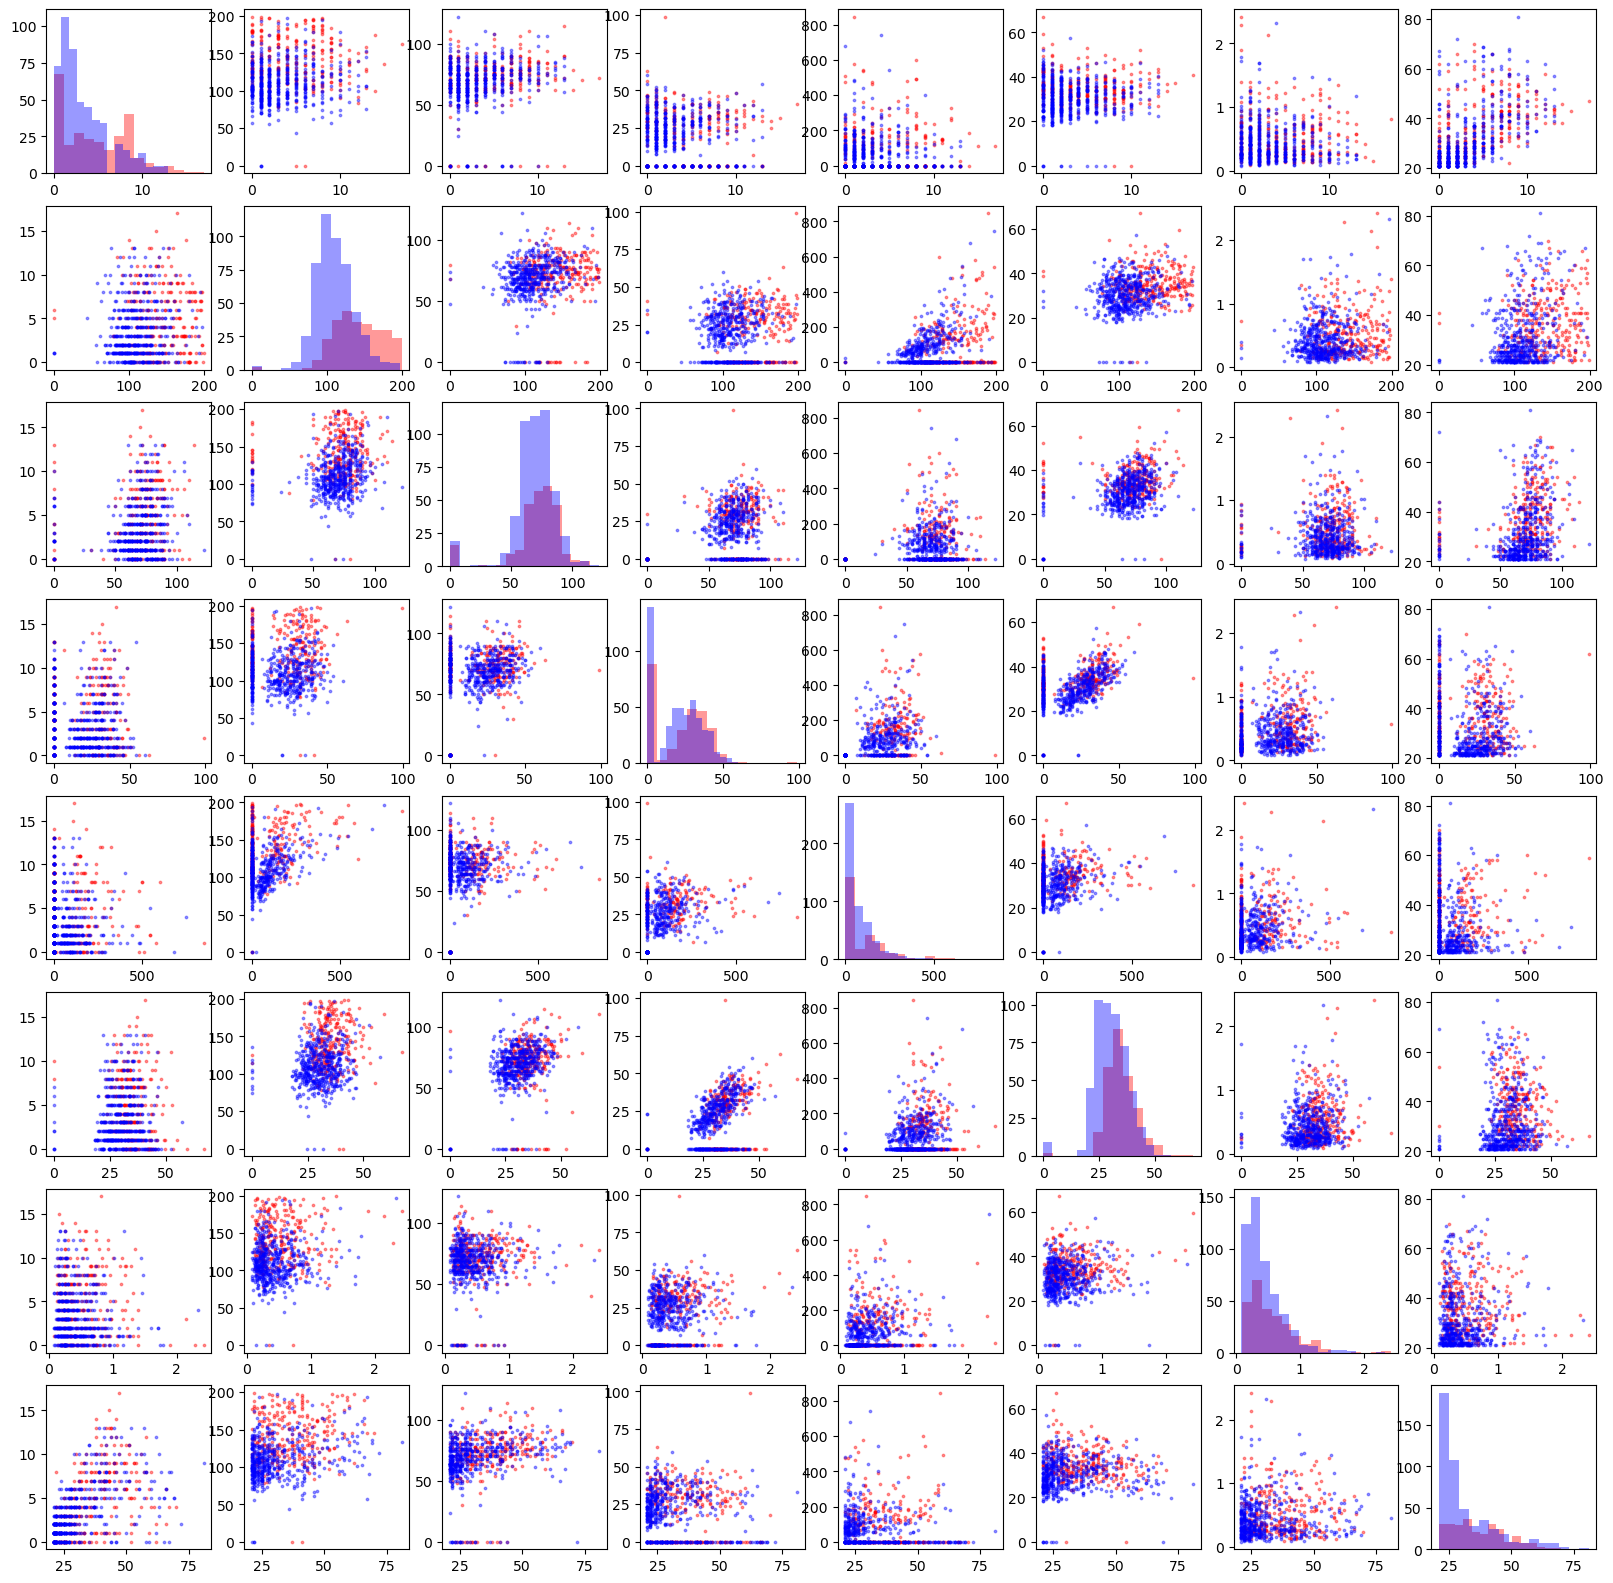

In [35]:
# code 
maskT = pima[:,pima.shape[1]-1] == 1
maskF = pima[:,pima.shape[1]-1] == 0
pima_true = pima[maskT]
pima_false = pima[maskF]

figs, axes = plt.subplots(pima.shape[1]-1, pima.shape[1]-1, figsize=(20,20))
for i in range(pima.shape[1]-1):
    for j in range(pima.shape[1]-1):
        if i == j:
            axes[i,i].hist(pima_true[:,i], bins=15, alpha=0.4, color="red")
            axes[i,i].hist(pima_false[:,i], bins=15, alpha=0.4, color="blue")
        else:
            axes[i,j].scatter(pima_true[:,i], pima_true[:,j], s=3, alpha=0.4, color="red")
            axes[i,j].scatter(pima_false[:,i], pima_false[:,j], s=3, alpha=0.4, color="blue")
        
